In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
data = pd.read_csv('Экспозиция ТДСК с 01.07.2023 по 31.12.2023.csv', delimiter='\t')
data

,id,advert_id,domain,developer,address,gp,description,entrance_number,floor,area,room_count,flat_number,price,published_at,actualized_at
0,051a54b2-3ba7-4ee2-854d-83ecf42a4d24,320298,t-dsk.ru,ТДСК,"ул. Монтажников, д. 40, подъезд 2, квартира №98",NaN,"1-комнатная квартира на ул. Монтажников, дом 4...",2,4,39.4,1,98,4250000,2023-06-01 05:39:34.605000+00:00,2023-08-01 00:04:42.827000+00:00
1,51e874ce-992a-4b10-b6a5-9b4dda6ff090,322718,t-dsk.ru,ТДСК,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",ГП-6,"1-комнатная квартира на ул. Монтажников, 42б. ...",3,15,39.7,1,223,4350000,2023-12-15 18:52:40.766000+00:00,2024-01-19 11:31:07.044000+00:00
2,27df5ffe-9b32-4c36-ba4f-d5a7df55a658,322708,t-dsk.ru,ТДСК,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",ГП-6,"1-комнатная квартира на ул. Монтажников, 42б. ...",3,13,39.6,1,213,4350000,2023-12-15 18:52:40.830000+00:00,2024-01-19 11:31:07.044000+00:00
3,51301e39-a645-4f61-9d64-433bed25e020,147042,t-dsk.ru,ТДСК,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",NaN,1-комнатная квартира на ул. Александра Митинск...,4,10,41.0,1,207,4100000,2023-03-13 05:12:22.130000+00:00,2023-08-01 00:04:42.827000+00:00
4,b50e0805-847f-49ae-8b7f-d93ef22980d5,320812,t-dsk.ru,ТДСК,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",ГП-7,2-комнатная квартира на ул. Александра Пушкина...,2,7,67.6,2,108,5800000,2023-08-27 12:11:50.852000+00:00,2023-09-01 17:10:30.524000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,fb9c189e-9477-4750-80a0-57965c8371e9,320843,t-dsk.ru,ТДСК,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",ГП-7.11,2-комнатная квартира на ул. Александра Пушкина...,2,14,67.8,2,139,5800000,2023-08-27 12:11:47.782000+00:00,2024-05-14 04:05:35.125000+00:00
2567,ac5f4e23-33a4-409d-9bbc-e851b0476fdc,321770,t-dsk.ru,ТДСК,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",ГП-7.1,1-комнатная квартира на ул. Федора Достоевског...,3,8,26.9,1,203,3500000,2023-10-06 12:52:39.908000+00:00,2024-05-14 04:06:11.689000+00:00
2568,8cb5e2fd-2075-48e3-8f87-6fea31e998a8,322717,t-dsk.ru,ТДСК,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",ГП-6.1,"1-комнатная квартира на ул. Монтажников, 42б. ...",3,15,37.5,1,222,4300000,2023-12-15 18:52:32.628000+00:00,2024-05-14 04:06:24.847000+00:00
2569,2be1dfe7-b854-4757-a76c-8150f2fcc796,321806,t-dsk.ru,ТДСК,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",ГП-7.1,1-комнатная квартира на ул. Федора Достоевског...,3,15,40.3,1,239,4400000,2023-10-06 12:53:29.729000+00:00,2024-05-14 04:06:28.085000+00:00


### Предобработка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2571 non-null   object 
 1   advert_id        2571 non-null   int64  
 2   domain           2571 non-null   object 
 3   developer        2571 non-null   object 
 4   address          2571 non-null   object 
 5   gp               1990 non-null   object 
 6   description      2571 non-null   object 
 7   entrance_number  2571 non-null   int64  
 8   floor            2571 non-null   int64  
 9   area             2571 non-null   float64
 10  room_count       2571 non-null   int64  
 11  flat_number      2571 non-null   int64  
 12  price            2571 non-null   int64  
 13  published_at     2571 non-null   object 
 14  actualized_at    2571 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 301.4+ KB


Отсутвуют значения только в столбце 'gp', что на дальнейший анализ влиять не будет. Важные столбцы с адресом, датами публикации/актуализации и комнатность содержат все данные, дополнительно обрабатывать их не требуется. \
Для столбцов с датами следует убрать время и временную зону, так как для дальнейшего сравнения они не потребуются.

In [4]:
data['actualized_at'] = pd.to_datetime(data['actualized_at']).dt.date
data['published_at'] = pd.to_datetime(data['published_at']).dt.date

## Задание 1

In [5]:
selected_columns = data.loc[:, ['address', 'published_at', 'actualized_at']]
selected_columns

,address,published_at,actualized_at
0,"ул. Монтажников, д. 40, подъезд 2, квартира №98",2023-06-01,2023-08-01
1,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19
2,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19
3,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",2023-03-13,2023-08-01
4,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2023-09-01
...,...,...,...
2566,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2024-05-14
2567,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14
2568,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-05-14
2569,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14


Выделение из полного адреса - адрес корпуса (без квартиры)

In [6]:
def extract_corpus_address(address):
    return re.split(r',\s*кв\w', address)[0].strip()

selected_columns['corpus_address'] = selected_columns['address'].apply(extract_corpus_address)
selected_columns

,address,published_at,actualized_at,corpus_address
0,"ул. Монтажников, д. 40, подъезд 2, квартира №98",2023-06-01,2023-08-01,"ул. Монтажников, д. 40, подъезд 2"
1,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3"
2,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3"
3,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",2023-03-13,2023-08-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под..."
4,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2023-09-01,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п..."
...,...,...,...,...
2566,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2024-05-14,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п..."
2567,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14,"ул. Федора Достоевского, д. 26, (ГП-7.1), под..."
2568,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-05-14,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3"
2569,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14,"ул. Федора Достоевского, д. 26, (ГП-7.1), под..."


In [7]:
start_date = pd.to_datetime('2023-07-01').date()
end_date = pd.to_datetime('2023-12-31').date()

start_series = pd.Series(start_date, index=selected_columns.index)
end_series = pd.Series(end_date, index=selected_columns.index)

selected_columns['date_start'] = selected_columns['published_at'].combine(start_series, func=max)
selected_columns['date_end'] = selected_columns['actualized_at'].combine(end_series, func=min)

In [8]:
selected_columns

,address,published_at,actualized_at,corpus_address,date_start,date_end
0,"ул. Монтажников, д. 40, подъезд 2, квартира №98",2023-06-01,2023-08-01,"ул. Монтажников, д. 40, подъезд 2",2023-07-01,2023-08-01
1,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3",2023-12-15,2023-12-31
2,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-01-19,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3",2023-12-15,2023-12-31
3,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",2023-03-13,2023-08-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",2023-07-01,2023-08-01
4,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2023-09-01,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2023-09-01
...,...,...,...,...,...,...
2566,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2024-05-14,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2023-08-27,2023-12-31
2567,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2023-12-31
2568,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",2023-12-15,2024-05-14,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3",2023-12-15,2023-12-31
2569,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2024-05-14,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",2023-10-06,2023-12-31


In [9]:
def get_dates(row):
    return pd.DataFrame({
        'date': pd.date_range(row['date_start'], row['date_end']),
        'address': row['corpus_address']
    })

final_dates = pd.concat([get_dates(row) for _, row in selected_columns.iterrows()], ignore_index=True)

In [10]:
table = final_dates.groupby(['date', 'address']).size().reset_index(name='active_count')

In [11]:
table = table.rename(columns={'date': 'Дата', 'address': 'Корпус', 'active_count': 'Кол-во активных квартир'})
table

,Дата,Корпус,Кол-во активных квартир
0,2023-07-01,"ул. Александра Митинского, д. 6, (ГП-3.1), по...",1
1,2023-07-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",10
2,2023-07-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",9
3,2023-07-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",10
4,2023-07-01,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",5
...,...,...,...
4977,2023-12-31,"ул. Монтажников, д. 42а, (ГП-5.11), подъезд 3",15
4978,2023-12-31,"ул. Монтажников, д. 38, подъезд 3",1
4979,2023-12-31,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",70
4980,2023-12-31,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",74


In [12]:
table.to_csv('Сводная таблица количества активных объектов за каждый день 2 полугодия 2023 год.csv', index=False)

## Задание 2

In [13]:
data_month = data.loc[:, ['address', 'room_count', 'published_at', 'actualized_at']]
data_month

,address,room_count,published_at,actualized_at
0,"ул. Монтажников, д. 40, подъезд 2, квартира №98",1,2023-06-01,2023-08-01
1,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-01-19
2,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-01-19
3,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",1,2023-03-13,2023-08-01
4,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2,2023-08-27,2023-09-01
...,...,...,...,...
2566,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2,2023-08-27,2024-05-14
2567,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",1,2023-10-06,2024-05-14
2568,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-05-14
2569,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",1,2023-10-06,2024-05-14


In [14]:
start_date = pd.to_datetime('2023-07-01').date()
end_date = pd.to_datetime('2023-12-31').date()

start_series = pd.Series(start_date, index=data_month.index)
end_series = pd.Series(end_date, index=data_month.index)

data_month['date_start'] = data_month['published_at'].combine(start_series, func=max)
data_month['date_end'] = data_month['actualized_at'].combine(end_series, func=min)

In [15]:
data_month

,address,room_count,published_at,actualized_at,date_start,date_end
0,"ул. Монтажников, д. 40, подъезд 2, квартира №98",1,2023-06-01,2023-08-01,2023-07-01,2023-08-01
1,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-01-19,2023-12-15,2023-12-31
2,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-01-19,2023-12-15,2023-12-31
3,"ул. Александра Митинского, д. 4, (ГП 3.8), под...",1,2023-03-13,2023-08-01,2023-07-01,2023-08-01
4,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2,2023-08-27,2023-09-01,2023-08-27,2023-09-01
...,...,...,...,...,...,...
2566,"ул. Александра Пушкина, д. 3, к.1 (ГП-7.11), п...",2,2023-08-27,2024-05-14,2023-08-27,2023-12-31
2567,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",1,2023-10-06,2024-05-14,2023-10-06,2023-12-31
2568,"ул. Монтажников, 42б. (ГП-6.1), подъезд 3, ква...",1,2023-12-15,2024-05-14,2023-12-15,2023-12-31
2569,"ул. Федора Достоевского, д. 26, (ГП-7.1), под...",1,2023-10-06,2024-05-14,2023-10-06,2023-12-31


In [16]:
def get_months(row):
    return pd.DataFrame({
        'month': pd.date_range(row['date_start'], row['date_end'], freq='MS').to_period('M'),
        'room_count': row['room_count']
    })

final_month = pd.concat([get_months(row) for _, row in data_month.iterrows()], ignore_index=True)

In [17]:
monthly_rooms = final_month.groupby(['month', 'room_count']).size().unstack()
monthly_rooms

room_count,1,2,3
month,,,
2023-07,486,52,179
2023-08,394,22,148
2023-09,599,114,238
2023-10,446,99,195
2023-11,485,147,208
2023-12,507,176,222


Линейный график

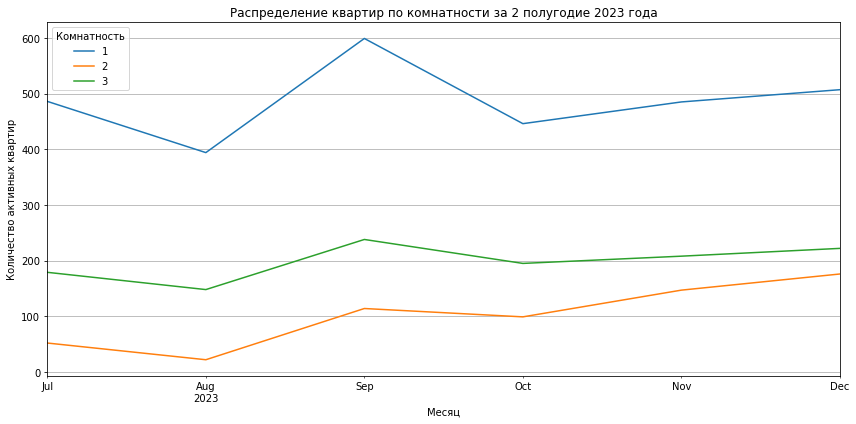

In [18]:
monthly_rooms.plot(kind='line', figsize=(12, 6))
plt.title('Распределение квартир по комнатности за 2 полугодие 2023 года')
plt.xlabel('Месяц')
plt.ylabel('Количество активных квартир')
plt.legend(title='Комнатность')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Столбчатая диаграмма

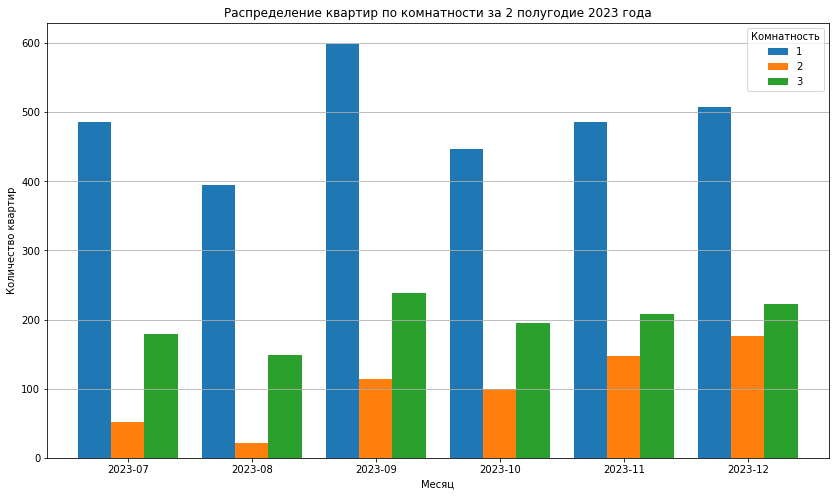

In [19]:
monthly_rooms.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Распределение квартир по комнатности за 2 полугодие 2023 года')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.legend(title='Комнатность')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Выводы
По графику сделать следующие выводы: 
- Однокомнатные объекты стабильно активны в течение всего периода. Самый пик по числу объектов (599) наблюдался в сентябре, наименьшее число в октябре после сильного скачка в предыдущем месяце. Это может указывать на ориентацию застройщика на этот тип жилья, либо на высокий интерес со стороны покупателей.
- Наименьшее количество активных объектов за весь период - двухкомнатные квартиры. Можно предположить, что это связано или с тем, что такие квартиры быстро находят покупателя, то есть высокая ликвидность, или с низким предложением от застройщика на такой тип квартир. Возможно стоит увеличивать количество предложений на двухкомнатные квартиры.
- Трехкомнатные квартиры средние по показателям. Они относительно стабильны на всем периоде. Вероятно спрос на такую комнатность самый устойчивый.
- Наибольшее число активных объектов за весь период - сентябрь. Вероятно связано с началом учебного/рабочего сезона, активизацией рынка после лета, началом нового квартала для ввода в эксплуатацию.
- Наименьшее число активных объектов за весь период - август. Вероятно связано с отпусками.
- Стабильный рост предложений ближе к декабрю. Возможно это связано с концом года, так как в это время застройщик вводит помещения в эксплуатацию.